In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics.pairwise import cosine_similarity


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\esman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv("./bbc_news.csv")

In [4]:
df['news'] = df['title'] + ' ' + df['description']
df['news']

0        Ukraine: Angry Zelensky vows to punish Russian...
1        War in Ukraine: Taking cover in a town under a...
2        Ukraine war 'catastrophic for global food' One...
3        Manchester Arena bombing: Saffie Roussos's par...
4        Ukraine conflict: Oil price soars to highest l...
                               ...                        
26299    Hamas hostages: Stories of the people taken fr...
26300    Images show major damage to Gaza's oldest mosq...
26301    Palestinians mourn writer killed in air strike...
26302    Gaza Strip in maps: How life has changed in tw...
26303    Video shows stripped Palestinian men detained ...
Name: news, Length: 26304, dtype: object

In [5]:
import nltk as nlp
description_list=[]
for desc in df.news:
    desc=re.sub("[^a-zA-Z]"," ",desc)
    desc=desc.lower()
    desc = nltk.word_tokenize(desc)
    lemma = nlp.WordNetLemmatizer()
    desc= [lemma.lemmatize(word) for word in desc]
    desc = " ".join(desc)
    description_list.append(desc)


In [6]:
description_list

['ukraine angry zelensky vow to punish russian atrocity the ukrainian president say the country will not forgive or forget those who murder it civilian',
 'war in ukraine taking cover in a town under attack jeremy bowen wa on the frontline in irpin a resident came under russian fire while trying to flee',
 'ukraine war catastrophic for global food one of the world s biggest fertiliser firm say the conflict could deliver a shock to food supply',
 'manchester arena bombing saffie roussos s parent on hearing the truth the parent of the manchester arena bombing s youngest victim speak about their life since she died',
 'ukraine conflict oil price soar to highest level since consumer are feeling the impact of higher energy cost a fuel price and household bill jump',
 'ukraine war pm to hold talk with world leader on further sanction boris johnson is to meet the canadian and dutch pm a mp debate new law targeting oligarch',
 'ukraine war uk grant ukrainian refugee visa so far the home secret

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
sparse_matrix = vectorizer.fit_transform(description_list)

In [8]:
description_list=pd.DataFrame(description_list)
description_list

,0
0,ukraine angry zelensky vow to punish russian a...
1,war in ukraine taking cover in a town under at...
2,ukraine war catastrophic for global food one o...
3,manchester arena bombing saffie roussos s pare...
4,ukraine conflict oil price soar to highest lev...
...,...
26299,hamas hostage story of the people taken from i...
26300,image show major damage to gaza s oldest mosqu...
26301,palestinian mourn writer killed in air strike ...
26302,gaza strip in map how life ha changed in two m...


In [9]:
n_components = 100
svd = TruncatedSVD(n_components=n_components)
svd_transfrom = svd.fit_transform(sparse_matrix)

In [10]:
cosine_similarities= cosine_similarity(svd_transfrom, svd_transfrom)
cosine_similarities

array([[ 1.        ,  0.4420865 ,  0.21606804, ...,  0.1246297 ,
        -0.00576569,  0.0317334 ],
       [ 0.4420865 ,  1.        ,  0.33399386, ...,  0.18693988,
         0.14063243,  0.01628462],
       [ 0.21606804,  0.33399386,  1.        , ...,  0.04965056,
         0.03123498,  0.03316122],
       ...,
       [ 0.1246297 ,  0.18693988,  0.04965056, ...,  1.        ,
         0.1363183 ,  0.22886141],
       [-0.00576569,  0.14063243,  0.03123498, ...,  0.1363183 ,
         1.        ,  0.56414658],
       [ 0.0317334 ,  0.01628462,  0.03316122, ...,  0.22886141,
         0.56414658,  1.        ]])

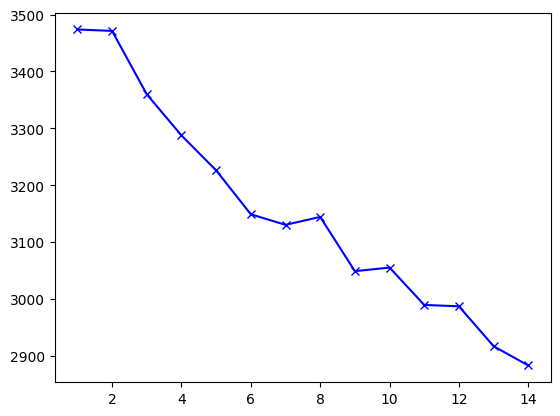

In [11]:
from sklearn.cluster import MiniBatchKMeans
wcss=[]

for k in range(1,15):
    kmeans= MiniBatchKMeans(n_clusters=k)
    kmeans.fit(svd_transfrom)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss,'bx-')

In [28]:
from sklearn.cluster import MiniBatchKMeans
kmeans_clst = MiniBatchKMeans(n_clusters=9, random_state=37, batch_size=25)
kmeans_clst = kmeans_clst.partial_fit(svd_transfrom)

In [29]:
description_list['kmeans_label'] = kmeans_clst.labels_
description_list


,0,kmeans_label
0,ukraine angry zelensky vow to punish russian a...,1
1,war in ukraine taking cover in a town under at...,2
2,ukraine war catastrophic for global food one o...,1
3,manchester arena bombing saffie roussos s pare...,1
4,ukraine conflict oil price soar to highest lev...,1
...,...,...
26299,hamas hostage story of the people taken from i...,1
26300,image show major damage to gaza s oldest mosqu...,1
26301,palestinian mourn writer killed in air strike ...,1
26302,gaza strip in map how life ha changed in two m...,1


In [30]:
tsvd_centers = TruncatedSVD(n_components=2, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d2_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d2_points = tsvd_centers.transform(svd_transfrom)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


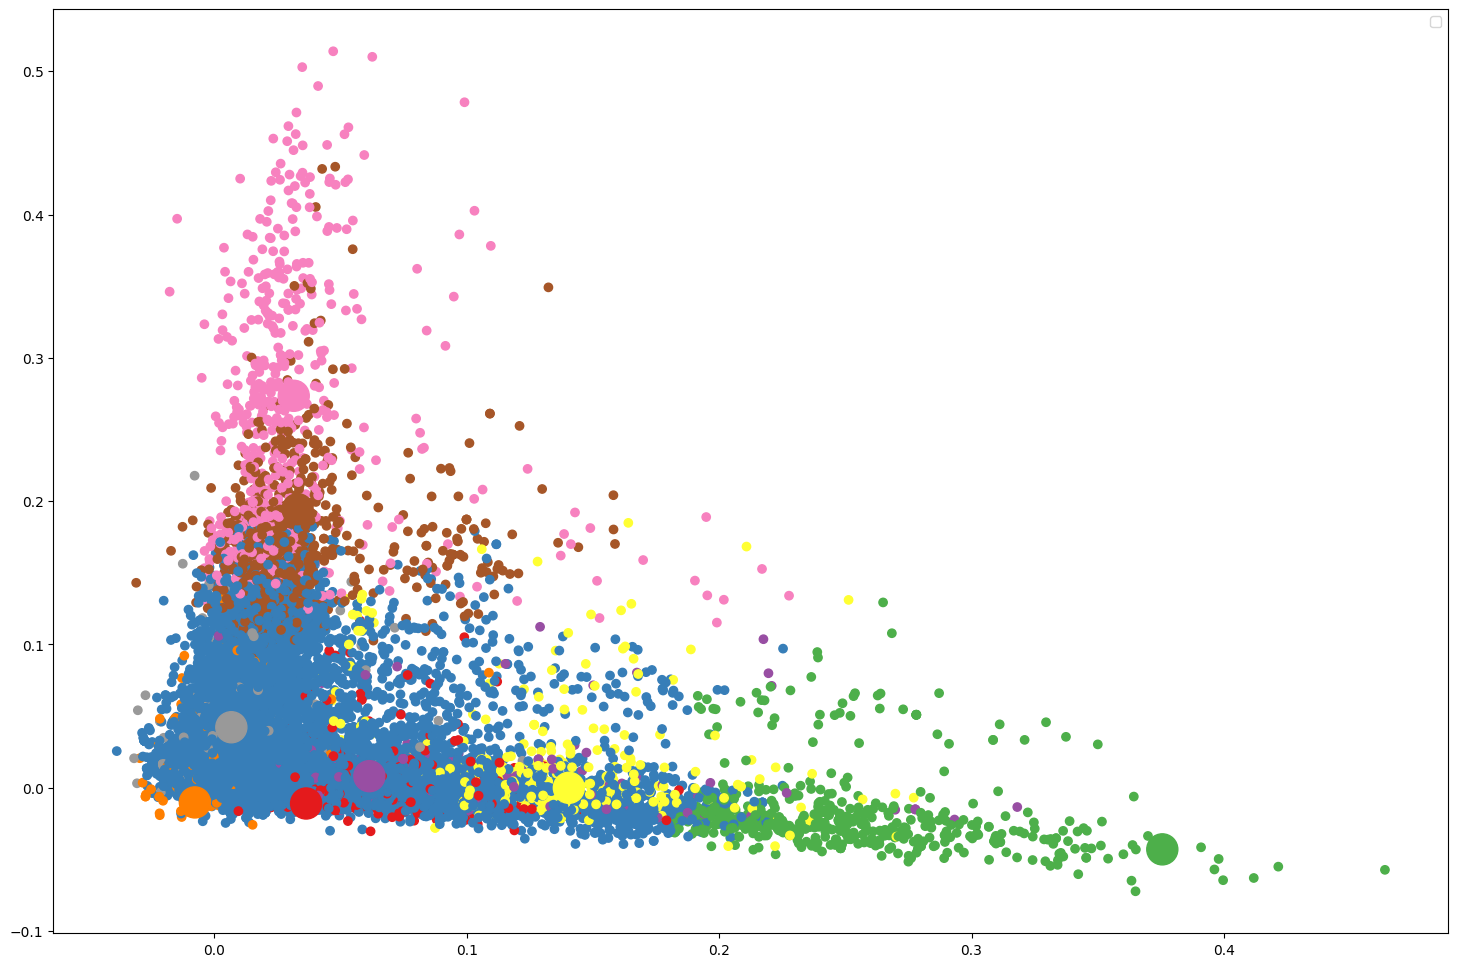

In [31]:

center_sizes = [500] * len(d2_centers)

# Scatter plot
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=kmeans_clst.labels_, cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=sorted(np.unique(kmeans_clst.labels_)), s=center_sizes, cmap='Set1')
plt.legend()
plt.show()
